In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [7]:
df = pd.read_csv("Customer-Churn-Records.csv")

In [8]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [9]:
##number of rows and columns
number_of_rows = len(df)
number_of_columns = len(df.columns)
print("number of rows :",number_of_rows)
print("number of columns :",number_of_columns)

number of rows : 10000
number of columns : 18


In [10]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64


In [12]:
# Columns with missing data
print(missing_percentage[missing_percentage > 0])


Series([], dtype: float64)


In [14]:
#Handling missing data
# Drop columns with more than 50% missing
df = df.dropna(thresh=len(df)*0.5, axis=1)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [17]:
# no missing values
print(df.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [18]:
# percentage of missing values
percentage_missing_per_column = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values per column:")
print(percentage_missing_per_column)

Percentage of missing values per column:
RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64


C:\Users\jashmitam\AppData\Local\Temp\ipykernel_19668\2584591398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Exited', palette='viridis')


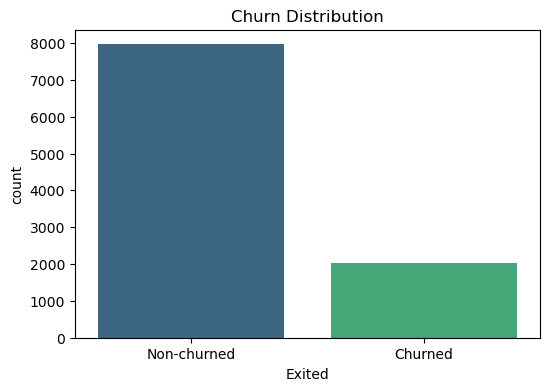

In [29]:
# Plot churn distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Exited', palette='viridis')
plt.xticks([0,1], ['Non-churned', 'Churned'])
plt.title('Churn Distribution')
plt.show()

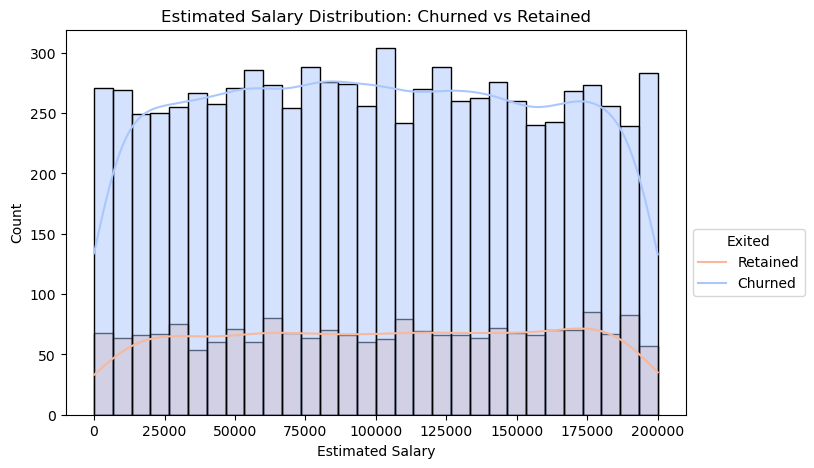

In [30]:
# Estimated Salary Distribution: Churned vs Retained
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', bins=30, kde=True, palette='coolwarm')
plt.title('Estimated Salary Distribution: Churned vs Retained')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Retained', 'Churned'],bbox_to_anchor=(1, 0.5))
plt.show()

C:\Users\jashmitam\AppData\Local\Temp\ipykernel_19668\1238498722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_gender.index, y=churn_by_gender.values, palette='Set2', ax=axes[0])
C:\Users\jashmitam\AppData\Local\Temp\ipykernel_19668\1238498722.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_geo.index, y=churn_by_geo.values, palette='Set3', ax=axes[1])
C:\Users\jashmitam\AppData\Local\Temp\ipykernel_19668\1238498722.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=churn_by_active.values, palett

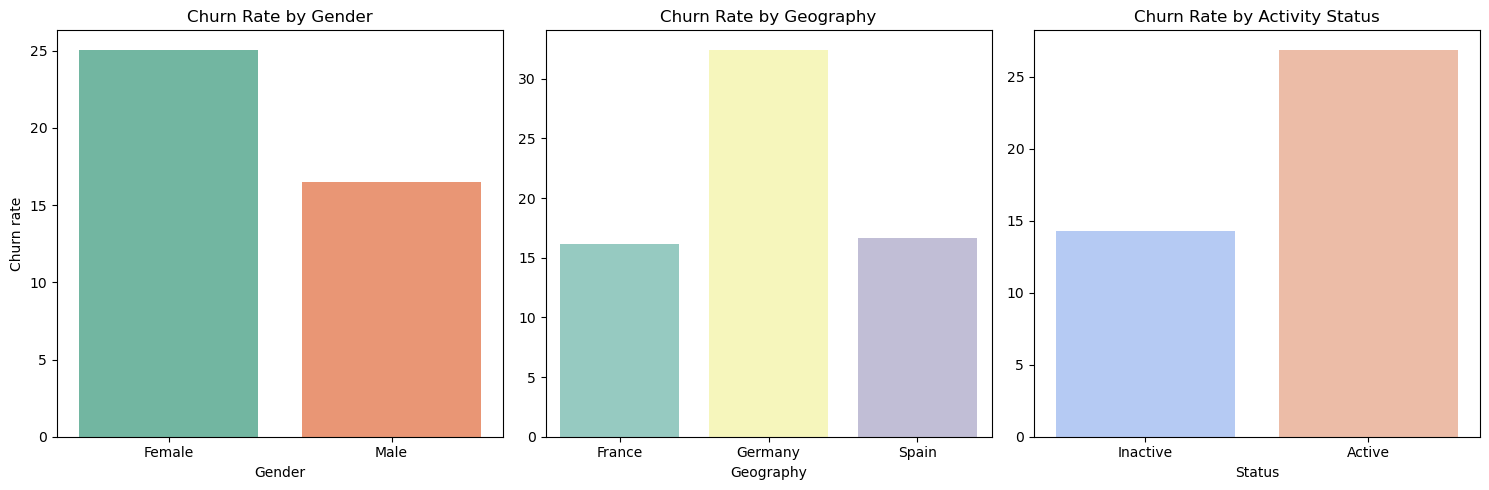

In [31]:
# churn rates by gender geography and active member
churn_by_gender = df.groupby('Gender')['Exited'].mean() * 100
churn_by_geo = df.groupby('Geography')['Exited'].mean() * 100
churn_by_active = df.groupby('IsActiveMember')['Exited'].mean() * 100

fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(x=churn_by_gender.index, y=churn_by_gender.values, palette='Set2', ax=axes[0])
axes[0].set_title('Churn Rate by Gender')
axes[0].set_ylabel('Churn rate')
axes[0].set_xlabel('Gender')

sns.barplot(x=churn_by_geo.index, y=churn_by_geo.values, palette='Set3', ax=axes[1])
axes[1].set_title('Churn Rate by Geography')
axes[1].set_xlabel('Geography')

labels = ['Inactive', 'Active']
sns.barplot(x=labels, y=churn_by_active.values, palette='coolwarm', ax=axes[2])
axes[2].set_title('Churn Rate by Activity Status')
axes[2].set_xlabel('Status')

plt.tight_layout()
plt.show()

In [32]:
# average CreditScore, Balance, and EstimatedSalary for churned vs retained customers
avg_metrics = df.groupby('Exited')[['CreditScore', 'Balance', 'EstimatedSalary']].mean()
print("Average CreditScore, Balance & EstimatedSalary (Churned vs Retained):\n")
print(avg_metrics)

Average CreditScore, Balance & EstimatedSalary (Churned vs Retained):

        CreditScore       Balance  EstimatedSalary
Exited                                            
0        651.837855  72742.750663     99726.853141
1        645.414622  91109.476006    101509.908783


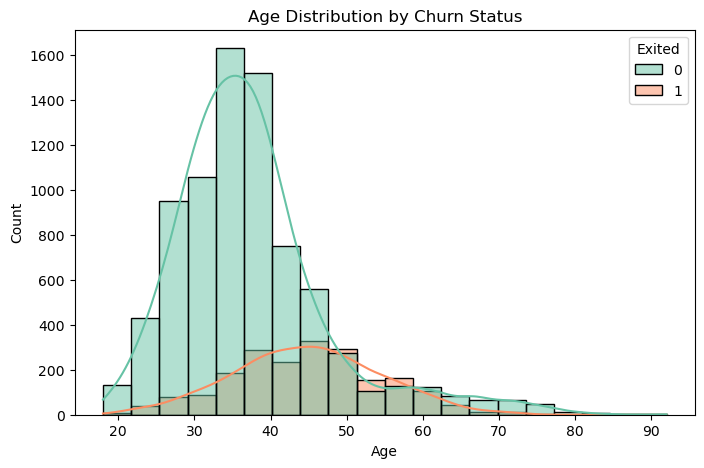

C:\Users\jashmitam\AppData\Local\Temp\ipykernel_19668\2355977733.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y='Age', palette='Set1')


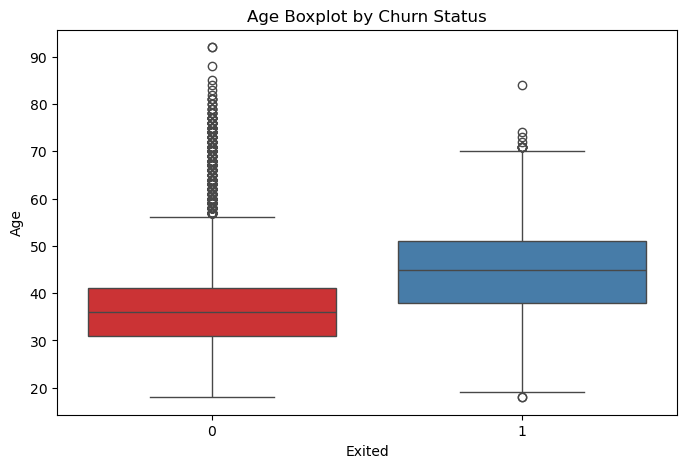

In [33]:
# age impact churn
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, bins=20, palette='Set2')
plt.title('Age Distribution by Churn Status')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Exited', y='Age', palette='Set1')
plt.title('Age Boxplot by Churn Status')
plt.show()

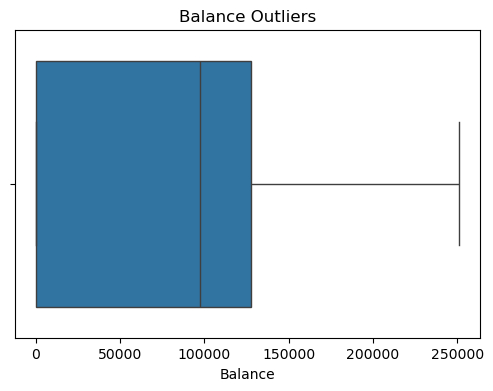

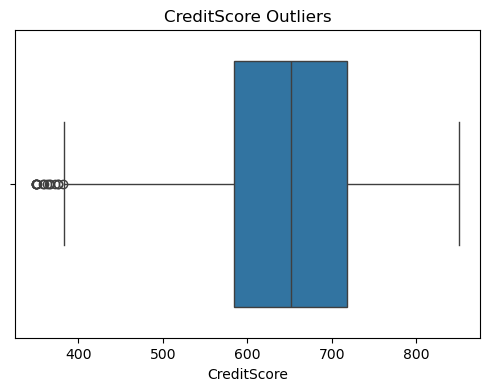

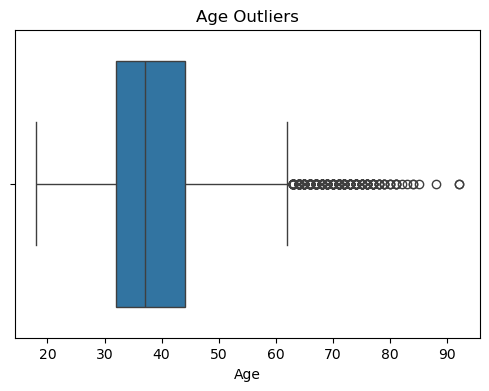

In [35]:
#Outliers
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Balance')
plt.title('Balance Outliers')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='CreditScore')
plt.title('CreditScore Outliers')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Age')
plt.title('Age Outliers')
plt.show()

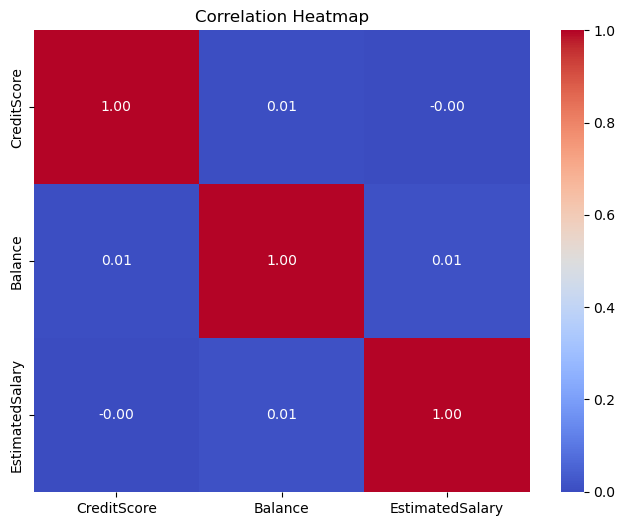

In [34]:
#correlation between numeric feature 
numeric_cols = ['CreditScore', 'Balance', 'EstimatedSalary']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [38]:
 #As per heatMap , numerical values don't have any correlations

In [36]:
# churn rate by age group
bins = [18, 30, 50, 100]
labels = ['Adults', 'Middle Age', 'Seniors']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
churn_by_agegroup = df.groupby('AgeGroup',observed=True)['Exited'].mean() * 100
print("\nChurn Rate by Age Group (%):\n", churn_by_agegroup)


Churn Rate by Age Group (%):
 AgeGroup
Adults         7.502569
Middle Age    19.598287
Seniors       44.647105
Name: Exited, dtype: float64


In [37]:
# Churn Rate by Number of Products
single_product_churn = df[df['NumOfProducts'] == 1]['Exited'].mean() * 100
multi_product_churn = df[df['NumOfProducts'] > 1]['Exited'].mean() * 100
print(f"\nChurn Rate (1 Product): {single_product_churn:.2f}%")
print(f"Churn Rate (>1 Product): {multi_product_churn:.2f}%")


Churn Rate (1 Product): 27.71%
Churn Rate (>1 Product): 12.79%
